In [ ]:
# Data Augmentation and L2 Regularization with and without Dropout

!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"isaac000o","key":"2c1a236c98c03c0ce703259671092452"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d legendahmed/alzheimermridataset


alzheimermridataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
filename = "alzheimermridataset.zip"

with ZipFile(filename,'r') as zip:
  print("Extracting of the file ...")
  zip.extractall()
  print("Done")

Extracting of the file ...
Done


Number of Images: 5121


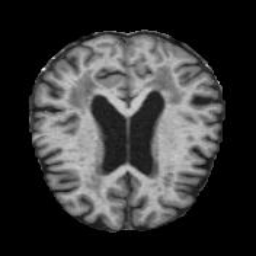

Number of Images: 1279


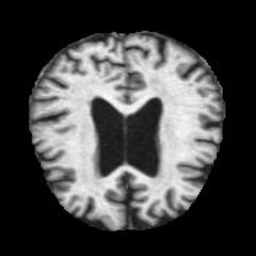

MildDemented:717,ModerateDemented:52,NonDemented:2560,VeryMildDemented:1792, Total:5121
MildDemented:179,ModerateDemented:12,NonDemented:640,VeryMildDemented:448, Total:1279
17920
20800
15360
17925
77126
77126
4032
4800
5120
5370
20601
20601
<class 'list'>
<class 'numpy.ndarray'>
(77126,)
(20601,)
(77126, 128, 128, 1)
(77126, 4)
(20601, 128, 128, 1)
(20601, 4)


In [ ]:
#libraries 
from imutils import paths
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Dropout, Flatten, Dense, MaxPool2D
from tensorflow.keras.models import Model, Sequential

from tensorflow.keras.optimizers import Adam, SGD


Training_images_paths = list(paths.list_images("/content/Alzheimer_s Dataset/train"))
Training_labels = []
Training_images = []

i = 0 
while i < len(Training_images_paths):
  Training_labels.append(Training_images_paths[i].split("/")[4])
  image = cv2.imread(Training_images_paths[i])
  image = cv2.resize(image,(256,256))
  Training_images.append(image)
  i = i + 1



print("Number of Images:",len(Training_labels))
cv2_imshow(Training_images[0])


Testing_images_paths = list(paths.list_images("/content/Alzheimer_s Dataset/test"))
Testing_labels = []
Testing_images = []

i = 0 
while i < len(Testing_images_paths):
  Testing_labels.append(Testing_images_paths[i].split("/")[4])
  image = cv2.imread(Testing_images_paths[i])
  image = cv2.resize(image,(256,256))
  Testing_images.append(image)
  i = i + 1



print("Number of Images:",len(Testing_labels))
cv2_imshow(Testing_images[0])


Mild_count = 0
Moderate_count = 0
Non_count = 0
VeryMild_count = 0
count = 0
for i in Training_labels:
  if i =="MildDemented":
    Mild_count = Mild_count + 1
  elif i =="ModerateDemented":
    Moderate_count = Moderate_count + 1
  elif i == "NonDemented":
    Non_count = Non_count + 1
  elif i == "VeryMildDemented":
    VeryMild_count = VeryMild_count +1 
  count = count + 1
print("MildDemented:{},ModerateDemented:{},NonDemented:{},VeryMildDemented:{}, Total:{}".format(Mild_count,Moderate_count,Non_count,VeryMild_count,count))


Mild_count = 0
Moderate_count = 0
Non_count = 0
VeryMild_count = 0
count = 0
for i in Testing_labels:
  if i =="MildDemented":
    Mild_count = Mild_count + 1
  elif i =="ModerateDemented":
    Moderate_count = Moderate_count + 1
  elif i == "NonDemented":
    Non_count = Non_count + 1
  elif i == "VeryMildDemented":
    VeryMild_count = VeryMild_count +1 
  count = count + 1
print("MildDemented:{},ModerateDemented:{},NonDemented:{},VeryMildDemented:{}, Total:{}".format(Mild_count,Moderate_count,Non_count,VeryMild_count,count))

"""
A balanced multiclass data is prepared for classification by using data augmentation 
for the class which has smaller number of images to get balanced with other classes. 
Augmentation is done by simply flipping the image along horizontal axis. 
This operation is vthealid because of the left and right symmetry of brain regions. 
The balanced set includes a total of 9506 images for each class, and a total of 38024 images for all classes.
@INPROCEEDINGS{8261460,
  author={Farooq, Ammarah and Anwar, SyedMuhammad and Awais, Muhammad and Rehman, Saad},
  booktitle={2017 IEEE International Conference on Imaging Systems and Techniques (IST)}, 
  title={A deep CNN based multi-class classification of Alzheimer's disease using MRI}, 
  year={2017},
  volume={},
  number={},
  pages={1-6},
  doi={10.1109/IST.2017.8261460}}
"""
data_generator = ImageDataGenerator(horizontal_flip=True)



Training_images_np = np.array(Training_images) 
Training_labels_np = np.array(Training_labels)

Testing_images_np = np.array(Testing_images) 
Testing_labels_np = np.array(Testing_labels)

aug_traning_images_VeryMildDemented = []
aug_traning_labels_VeryMildDemented = []
v = 0 
while v < 1792:
  traning_image = Training_images_np[v]
  traning_image = traning_image.reshape((1,)+traning_image.shape)
  it = data_generator.flow(traning_image,batch_size=1,shuffle=True)

  for i in range(10):
    batch = it.next()
    aug_traning_image = batch[0].astype('uint8') 
    aug_traning_images_VeryMildDemented.append(aug_traning_image)
    aug_traning_labels_VeryMildDemented.append(Training_labels[v])
  v = v+1

print(len(aug_traning_labels_VeryMildDemented))


aug_traning_images_ModerateDemented = []
aug_traning_labels_ModerateDemented = []

v = 1792 
while v < 1844:
  traning_image = Training_images_np[v]
  traning_image = traning_image.reshape((1,)+traning_image.shape)
  it = data_generator.flow(traning_image,batch_size=1,shuffle=True)

  for i in range(400):
    batch = it.next()
    aug_traning_image = batch[0].astype('uint8') 
    aug_traning_images_ModerateDemented.append(aug_traning_image)
    aug_traning_labels_ModerateDemented.append(Training_labels[v])
  v = v+1
print(len(aug_traning_labels_ModerateDemented))


aug_traning_images_NonDemented = []
aug_traning_labels_NonDemented = []

v = 1844 
while v < 4404:
  traning_image = Training_images_np[v]
  traning_image = traning_image.reshape((1,)+traning_image.shape)
  it = data_generator.flow(traning_image,batch_size=1,shuffle=True)

  for i in range(6):
    batch = it.next()
    aug_traning_image = batch[0].astype('uint8') 
    aug_traning_images_NonDemented.append(aug_traning_image)
    aug_traning_labels_NonDemented.append(Training_labels[v])
  v = v+1



print(len(aug_traning_labels_NonDemented))

aug_traning_images_MildDemented = []
aug_traning_labels_MildDemented = []

v = 4404 
while v < len(Training_labels):
  traning_image = Training_images_np[v]
  traning_image = traning_image.reshape((1,)+traning_image.shape)
  it = data_generator.flow(traning_image,batch_size=1,shuffle=True)

  for i in range(25):
    batch = it.next()
    aug_traning_image = batch[0].astype('uint8') 
    aug_traning_images_MildDemented.append(aug_traning_image)
    aug_traning_labels_MildDemented.append(Training_labels[v])
  v = v+1


print(len(aug_traning_labels_MildDemented))

aug_traning_images = aug_traning_images_MildDemented + aug_traning_images_NonDemented + aug_traning_images_ModerateDemented + aug_traning_images_VeryMildDemented+Training_images
aug_traning_labels = aug_traning_labels_MildDemented + aug_traning_labels_NonDemented + aug_traning_labels_ModerateDemented + aug_traning_labels_VeryMildDemented+Training_labels

print(len(aug_traning_images))
print(len(aug_traning_labels))



aug_testing_images_VeryMildDemented = []
aug_testing_labels_VeryMildDemented = []
x = 0 
while x < 448:
  testing_image = Testing_images_np[x]
  testing_image = testing_image.reshape((1,)+testing_image.shape)
  it = data_generator.flow(testing_image,batch_size=1,shuffle=True)

  for i in range(9):
    batch = it.next()
    aug_testing_image = batch[0].astype('uint8') 
    aug_testing_images_VeryMildDemented.append(aug_testing_image)
    aug_testing_labels_VeryMildDemented.append(Testing_labels[x])
  x = x+1

print(len(aug_testing_labels_VeryMildDemented))


aug_testing_images_ModerateDemented = []
aug_testing_labels_ModerateDemented = []
x = 448 
while x < 460:
  testing_image = Testing_images_np[x]
  testing_image = testing_image.reshape((1,)+testing_image.shape)
  it = data_generator.flow(testing_image,batch_size=1,shuffle=True)

  for i in range(400):
    batch = it.next()
    aug_testing_image = batch[0].astype('uint8') 
    aug_testing_images_ModerateDemented.append(aug_testing_image)
    aug_testing_labels_ModerateDemented.append(Testing_labels[x])
  x = x+1

print(len(aug_testing_labels_ModerateDemented))


aug_testing_images_NonDemented = []
aug_testing_labels_NonDemented = []
x = 460 
while x < 1100:
  testing_image = Testing_images_np[x]
  testing_image = testing_image.reshape((1,)+testing_image.shape)
  it = data_generator.flow(testing_image,batch_size=1,shuffle=True)

  for i in range(8):
    batch = it.next()
    aug_testing_image = batch[0].astype('uint8') 
    aug_testing_images_NonDemented.append(aug_testing_image)
    aug_testing_labels_NonDemented.append(Testing_labels[x])
  x = x+1

print(len(aug_testing_labels_NonDemented))


aug_testing_images_MildDemented = []
aug_testing_labels_MildDemented = []
x = 1100 

while x < len(Testing_labels):
  testing_image = Testing_images_np[x]
  testing_image = testing_image.reshape((1,)+testing_image.shape)
  it = data_generator.flow(testing_image,batch_size=1,shuffle=True)
  #130
  for i in range(30):
    batch = it.next()
    aug_testing_image = batch[0].astype('uint8') 
    aug_testing_images_MildDemented.append(aug_testing_image)
    aug_testing_labels_MildDemented.append(Testing_labels[x])
  x = x+1

print(len(aug_testing_labels_MildDemented))


aug_testing_images = aug_testing_images_MildDemented + aug_testing_images_NonDemented + aug_testing_images_ModerateDemented + aug_testing_images_VeryMildDemented + Testing_images
aug_testing_labels = aug_testing_labels_MildDemented + aug_testing_labels_NonDemented + aug_testing_labels_ModerateDemented + aug_testing_labels_VeryMildDemented + Testing_labels

print(len(aug_testing_images))
print(len(aug_testing_labels))





i = 0 
while i <len(aug_traning_images):
  image = aug_traning_images[i]
  image = cv2.resize(image,(128,128))
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  aug_traning_images[i] = image
  i = i + 1


n = 0 
while n < len(aug_testing_images):
  image = aug_testing_images[n]
  image = cv2.resize(image,(128,128))
  image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  aug_testing_images[n] = image
  n = n + 1

print(type(aug_traning_images))
aug_traning_images = np.array(aug_traning_images)
aug_testing_images = np.array(aug_testing_images)
print(type(aug_traning_images))


aug_traning_images = aug_traning_images/255.00
aug_testing_images = aug_testing_images/255.00

label_encoder = LabelEncoder()

aug_traning_labels = label_encoder.fit_transform(aug_traning_labels)
print(aug_traning_labels.shape)

label_encoder = LabelEncoder()
aug_testing_labels = label_encoder.fit_transform(aug_testing_labels)
print(aug_testing_labels.shape)

aug_traning_labels = to_categorical(aug_traning_labels)
aug_testing_labels = to_categorical(aug_testing_labels)

aug_traning_images = np.expand_dims(aug_traning_images, axis=-1)
aug_testing_images = np.expand_dims(aug_testing_images, axis=-1)


print(aug_traning_images.shape)
print(aug_traning_labels.shape)
print(aug_testing_images.shape)
print(aug_testing_labels.shape)

In [ ]:
import tensorflow as tf
def Alzheimer_Data_Augmentation(input_shape=(128, 128, 1)):
    regularizer = tf.keras.regularizers.l2(0.001)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu', kernel_regularizer=regularizer))
    model.add(MaxPool2D((9, 9), strides=(3, 3)))
    model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu', kernel_regularizer=regularizer))
    model.add(MaxPool2D((7, 7), strides=(3, 3)))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu', kernel_regularizer=regularizer))
    model.add(MaxPool2D((5, 5), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu', kernel_regularizer=regularizer))
    model.add(MaxPool2D((3, 3), strides=(2, 2)))    
    
    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4, activation='softmax'))
    optimizer = Adam(3.15e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model= Alzheimer_Data_Augmentation(input_shape=(128, 128, 1))
model.summary()

hist_ = model.fit(aug_traning_images, aug_traning_labels, batch_size=128, epochs=200, validation_data=(aug_testing_images, aug_testing_labels))


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 128)     3328      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (None, 40, 40, 64)        204864    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 4, 4, 32)        

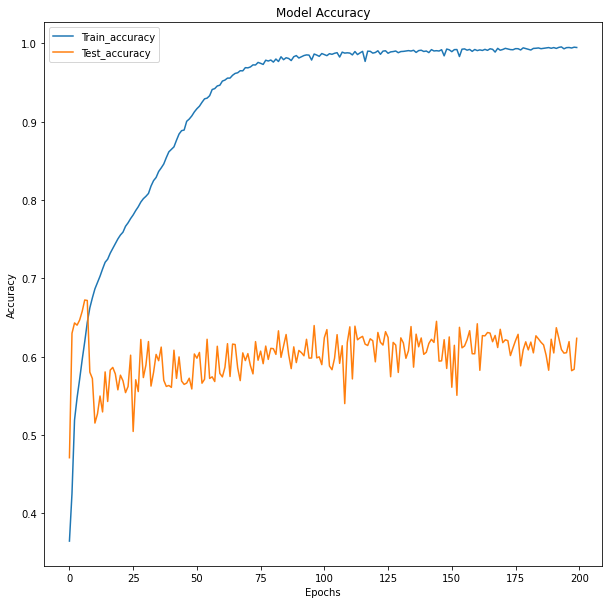

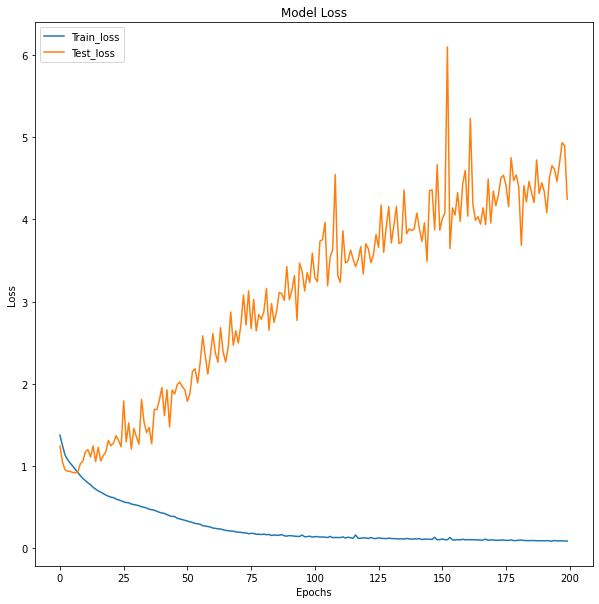

              precision    recall  f1-score   support

           0       0.94      0.46      0.62      6315
           1       0.00      0.00      0.00       108
           2       0.78      0.75      0.77      9698
           3       0.32      0.59      0.42      4480

    accuracy                           0.62     20601
   macro avg       0.51      0.45      0.45     20601
weighted avg       0.73      0.62      0.64     20601



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10, 10))
plt.plot(hist_.history['accuracy'], label='Train_accuracy')
plt.plot(hist_.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist_.history['loss'], label='Train_loss')
plt.plot(hist_.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

from sklearn.metrics import classification_report

ypred = model.predict(aug_testing_images)
ypred = np.argmax(ypred, axis=1)
y_test_pred = np.argmax(aug_testing_labels, axis=1)
print(classification_report(y_test_pred, ypred))

In [ ]:
test_loss, test_acc = model.evaluate(aug_testing_images, aug_testing_labels)
print('test_acc:', test_acc)


644/644 [==============================] - 7s 11ms/step - loss: 4.2462 - accuracy: 0.6233
test_acc: 0.6232706904411316


In [ ]:
import tensorflow as tf
def Alzheimer_Data_Augmentation(input_shape=(128, 128, 1)):
    regularizer = tf.keras.regularizers.l2(0.001)
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Conv2D(128, (5, 5), padding='same', strides=(1, 1), name='conv1', activation='relu', kernel_regularizer=regularizer))
    model.add(MaxPool2D((9, 9), strides=(3, 3)))
    model.add(Conv2D(64, (5, 5), padding='same', strides=(1, 1), name='conv2', activation='relu', kernel_regularizer=regularizer))
    model.add(MaxPool2D((7, 7), strides=(3, 3)))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv3', activation='relu', kernel_regularizer=regularizer))
    model.add(MaxPool2D((5, 5), strides=(2, 2)))
    model.add(Conv2D(32, (3, 3), padding='same', strides=(1, 1), name='conv4', activation='relu', kernel_regularizer=regularizer))
    model.add(MaxPool2D((3, 3), strides=(2, 2)))    
    
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(4, activation='softmax'))
    optimizer = Adam(3.15e-5)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model= Alzheimer_Data_Augmentation(input_shape=(128, 128, 1))
model.summary()

hist_ = model.fit(aug_traning_images, aug_traning_labels, batch_size=128, epochs=200, validation_data=(aug_testing_images, aug_testing_labels))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 128, 128, 128)     3328      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 40, 40, 128)      0         
 2D)                                                             
                                                                 
 conv2 (Conv2D)              (None, 40, 40, 64)        204864    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 conv3 (Conv2D)              (None, 12, 12, 32)        18464     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 32)        

In [ ]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10, 10))
plt.plot(hist_.history['accuracy'], label='Train_accuracy')
plt.plot(hist_.history['val_accuracy'], label='Test_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper left")
plt.show()

figure2 = plt.figure(figsize=(10, 10))
plt.plot(hist_.history['loss'], label='Train_loss')
plt.plot(hist_.history['val_loss'], label='Test_loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="upper left")
plt.show()

from sklearn.metrics import classification_report

ypred = model.predict(aug_testing_images)
ypred = np.argmax(ypred, axis=1)
y_test_pred = np.argmax(aug_testing_labels, axis=1)
print(classification_report(y_test_pred, ypred))

test_loss, test_acc = model.evaluate(aug_testing_images, aug_testing_labels)
print('test_acc:', test_acc)

NameError: ignored

<Figure size 720x720 with 0 Axes>